In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing


In [ ]:
def normalization(data,colN):
    print (data)
    colNames=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]
    data2=data[colNames]
    min_max_scaler=preprocessing.MinMaxScaler()
    x_scaled=min_max_scaler.fit_transform(data2)
    data[colNames]=x_scaled
    print ("transformed data")
    return data

def load():
    colNames=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Class"]
    data=pd.read_csv("pima-indians-diabetes.csv",names=colNames)
    #print (data)
    
    data2=normalization(data,colNames)
    
    
    train,validate,test=np.split(data2.sample(frac=1),[int(.8*len(data2)),int(.90*len(data2))])
    print (test)
    yTrain=train["Class"]
    print(yTrain)
    XTrain=train.drop("Class",axis="columns")
    print(XTrain)
    
    XTest=test.drop("Class",axis="columns")
    yTest=test["Class"]
    XVal=validate.drop("Class",axis="columns")
    yVal=validate["Class"]
    #fit train set
    accTrain=[]
    accVal=[]
    maxTrees=[]
    for i in range(1,200):
        model=AdaBoostClassifier(n_estimators=i,learning_rate=1,algorithm="SAMME")
        model.fit(XTrain,yTrain)
        pred=model.predict(XTrain)
        acc=accuracy_score(yTrain,pred)
        accTrain.append(acc)
        test=model.predict(XVal)
        acc=accuracy_score(yVal,test)
        accVal.append(acc)
        maxTrees.append(i)
    
    print("train max accuracy",max(accTrain))
    index_max = max(range(len(accTrain)), key=accTrain.__getitem__)
    print(index_max)
    print("val max accuracy ",max(accVal))
    index_max = max(range(len(accVal)), key=accVal.__getitem__)
    print("number of trees by validation set ",maxTrees[index_max])
    plt.figure(1)
    axes = plt.gca()
    axes.set_xlim([1,200])
    axes.set_ylim([0.6,1.0])
    d=pd.DataFrame({"accTrain":pd.Series(accTrain),"accVal":pd.Series(accVal),"max_trees":pd.Series(maxTrees)})
    #plt.plot("max_depth","accTrain","accVal",data=d,label="train")
    
    plt.plot("max_trees","accTrain",data=d,label="train")
    plt.plot("max_trees","accVal",data=d,label="val")
    plt.xlabel("max trees")
    plt.ylabel("accuracy")
    plt.legend()
    
    
    #use validation set
    learningR=np.linspace(0.001,1.5,10)
    learning=[]
    accTrain=[]
    accVal=[]
    
    for i in learningR:
        model=AdaBoostClassifier(n_estimators=16,learning_rate=i,algorithm="SAMME")
        model.fit(XTrain,yTrain)
        pred=model.predict(XTrain)
        acc=accuracy_score(yTrain,pred)
        accTrain.append(acc)
        val=model.predict(XVal)
        acc=accuracy_score(yVal,val)
        accVal.append(acc)
        learning.append(i)
    
    print("validation")
    print("train ",max(accTrain))
    index_max = max(range(len(accTrain)), key=accTrain.__getitem__)
    print("index max value ",index_max)
    print("max value ",max(accVal))
    index_max = max(range(len(accVal)), key=accVal.__getitem__)
    print("learning rate value ",accVal[index_max])
    
    plt.figure(2)
    axes = plt.gca()
    axes.set_xlim([0,2])
    axes.set_ylim([0.6,1.0])
    d=pd.DataFrame({"accTrain":pd.Series(accTrain),"accVal":pd.Series(accVal),"learningRate":pd.Series(learning)})
    #plt.plot("learningRate","accTrain","accVal",data=d,label="train")
    plt.plot("learningRate","accTrain",data=d,label="train")
    plt.plot("learningRate","accVal",data=d,label="val")
    plt.xlabel("learning Rate")
    plt.ylabel("accuracy")
    plt.legend()
    #use test set
    print("test")
    model=AdaBoostClassifier(n_estimators=16,learning_rate=0.80,algorithm="SAMME")
    print(model)
    #model.fit(XTrain,yTrain)
    """test=model.predict(XTest)
    acc=accuracy_score(yTest,test)
    print (acc)"""
    
    print(cross_val_score(model, XTrain, yTrain, cv = 10).mean())

In [ ]:
def main():
    load()

In [ ]:
from google.colab import files
data_to_load = files.upload()

     Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Class
0              6      148             72  ...                     0.627   50      1
1              1       85             66  ...                     0.351   31      0
2              8      183             64  ...                     0.672   32      1
3              1       89             66  ...                     0.167   21      0
4              0      137             40  ...                     2.288   33      1
..           ...      ...            ...  ...                       ...  ...    ...
763           10      101             76  ...                     0.171   63      0
764            2      122             70  ...                     0.340   27      0
765            5      121             72  ...                     0.245   30      0
766            1      126             60  ...                     0.349   47      1
767            1       93             70  ...                     0.315   23

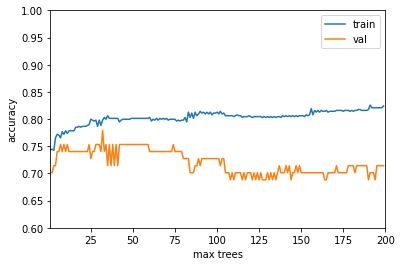

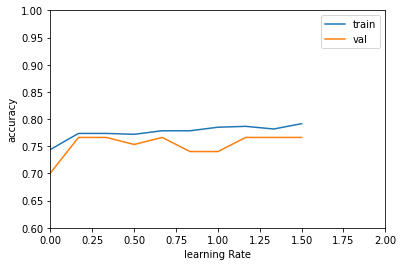

In [ ]:
main()

In [ ]:
from google.colab import files
data_to_load = files.upload()